# 1. Visualización de clientes

En este notebook se realiza un análisis general de los clientes de la entidad financiera con el fin de describir sus datos y encontrar posibles inconcistencias en los datos.

Se evitará mostrar cualquier información sensible (cols_to_hide)

### Problemas: 
Algunos de los problemas encontrados a lo largo del notebook son:

* Clientes con 1 año y 147 años (probablemente la persona con 147 en verdad tenga 47, es un caso aislado)
* Columnas desde RUT_EMPLEADOR_1 hasta REPRESENTANTE_LEGAL_EMP_2 vacías (20 columnas)
* Solo se cuente con la profesión de 45328 clientes (3%)
* Muchos clientes sin datos de renta

In [1]:
import pandas as pd

clientes = pd.DataFrame()

for i in [1,2,3]:
    file = '../AFP data/Clientes/cl'+str(i)+'v3.csv'
    print("cargando clientes "+str(i))
    cl = pd.read_csv(file, encoding='latin-1')
    clientes = clientes.append(cl)
    
del cl

cargando clientes 1
cargando clientes 2
cargando clientes 3


In [2]:
# Listando atributos
list(clientes)

['EXTERNAL_ID',
 'RUT',
 'NOMBRES',
 'PATERNO',
 'MATERNO',
 'TIPO_SEXO',
 'FECHA_NACIMIENTO',
 'EDAD',
 'PAIS_NACIMIENTO',
 'PAIS_NACIONALIDAD',
 'PENSIONADO',
 'EMAIL',
 'TELEFONO',
 'TELEFONO_OFICINA',
 'TELEFONO_CELULAR',
 'PROFESION',
 'TIPO_TRABAJADOR',
 'RENTA_IMPONIBLE',
 'AFP_ACTUAL',
 'CALLE',
 'COMUNA',
 'REGION',
 'CODIGO_POSTAL',
 'RUT_EMPLEADOR_1',
 'RAZON_SOCIAL_1',
 'CALLE_EMP_1',
 'NUMERO_EMPL_1',
 'DPTO_EMP_1',
 'COMUNA_EMP_1',
 'REGION_EMP_1',
 'CODIGO_POSTAL_1',
 'ACTIVIDAD_ECONOMICA_EMP_1',
 'REPRESENTANTE_LEGAL_EMP_1',
 'RUT_EMPLEADOR_2',
 'RAZON_SOCIAL_2',
 'CALLE_EMP_2',
 'NUMERO_EMPL_2',
 'DPTO_EMP_2',
 'COMUNA_EMP_2',
 'REGION_EMP_2',
 'CODIGO_POSTAL_2',
 'ACTIVIDAD_ECONOMICA_EMP_2',
 'REPRESENTANTE_LEGAL_EMP_2',
 'VIGENTE',
 'ATAC']

In [3]:
cols_to_hide = ['EXTERNAL_ID','RUT','NOMBRES','PATERNO','MATERNO', 
        'EMAIL','TELEFONO','TELEFONO_OFICINA','TELEFONO_CELULAR',
        'RENTA_IMPONIBLE','RUT_EMPLEADOR_1','RUT_EMPLEADOR_2']

In [4]:
clientes.drop(columns=cols_to_hide).head()

,TIPO_SEXO,FECHA_NACIMIENTO,EDAD,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,PENSIONADO,PROFESION,TIPO_TRABAJADOR,AFP_ACTUAL,CALLE,...,CALLE_EMP_2,NUMERO_EMPL_2,DPTO_EMP_2,COMUNA_EMP_2,REGION_EMP_2,CODIGO_POSTAL_2,ACTIVIDAD_ECONOMICA_EMP_2,REPRESENTANTE_LEGAL_EMP_2,VIGENTE,ATAC
0,Masculino,12-03-1912,106,CHILE,CHILE,NaN,NaN,DEPENDIENTE,CuprumAFP,ADRIAN ZUNIGA 811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigente,0.0
1,Masculino,05-02-1940,78,CHILE,CHILE,NaN,NaN,DEPENDIENTE,CuprumAFP,REAL PONTEVEDRA 1774 VILLA ESPANA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigente,NaN
2,Masculino,06-09-1946,72,CHILE,CHILE,NaN,NaN,DEPENDIENTE,CuprumAFP,Los Zorzales 422 Paloma 1 0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigente,0.0
3,Masculino,11-12-1943,74,CHILE,CHILE,NaN,NaN,DEPENDIENTE,NaN,LINARES CORREO COPIHUE POBL COPIHUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Vigente,NaN
4,Masculino,25-05-1913,105,CHILE,CHILE,NaN,NaN,INDEPENDIENTE,CuprumAFP,LAS BRISAS 38 PARD. 23 GRAN AVDA.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vigente,NaN


In [35]:
clientes[clientes.EXTERNAL_ID != clientes.RUT]

,EXTERNAL_ID,RUT,NOMBRES,PATERNO,MATERNO,TIPO_SEXO,FECHA_NACIMIENTO,EDAD,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,...,CALLE_EMP_2,NUMERO_EMPL_2,DPTO_EMP_2,COMUNA_EMP_2,REGION_EMP_2,CODIGO_POSTAL_2,ACTIVIDAD_ECONOMICA_EMP_2,REPRESENTANTE_LEGAL_EMP_2,VIGENTE,ATAC


Los campos EXTERNAL_ID  y RUT son iguales para todas las filas, entonces, podemos borrar una de ellas

In [36]:
clientes.describe()

,EDAD,PENSIONADO,TELEFONO,TELEFONO_OFICINA,TELEFONO_CELULAR,RENTA_IMPONIBLE,CODIGO_POSTAL,RUT_EMPLEADOR_1,RAZON_SOCIAL_1,CALLE_EMP_1,...,RAZON_SOCIAL_2,CALLE_EMP_2,NUMERO_EMPL_2,DPTO_EMP_2,COMUNA_EMP_2,REGION_EMP_2,CODIGO_POSTAL_2,ACTIVIDAD_ECONOMICA_EMP_2,REPRESENTANTE_LEGAL_EMP_2,ATAC
count,1.520304e+06,0.0,1.884000e+03,1.450000e+02,7.329770e+05,9.837030e+05,5.158390e+05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,819823.000000
mean,5.092354e+01,NaN,5.801498e+08,5.402163e+08,9.835144e+08,1.133976e+06,5.583606e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.593146
std,1.251551e+01,NaN,3.616413e+08,3.197655e+08,1.641052e+07,7.280829e+05,2.893964e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.487403
min,1.000000e+00,NaN,2.374780e+06,2.450906e+07,2.230225e+07,0.000000e+00,1.000000e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.200000e+01,NaN,2.264892e+08,2.276363e+08,9.766851e+08,4.410160e+05,2.580158e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5.000000e+01,NaN,5.288885e+08,4.428791e+08,9.873592e+08,1.098632e+06,6.201243e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,5.900000e+01,NaN,9.740895e+08,9.519877e+08,9.944613e+08,1.897336e+06,8.220005e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
max,1.470000e+02,NaN,9.999924e+08,9.987210e+08,1.000000e+09,2.120232e+06,9.999999e+06,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000


In [9]:
clientes['PENSIONADO'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: PENSIONADO, dtype: float64

In [10]:
clientes['TIPO_TRABAJADOR'].head()

0      DEPENDIENTE
1      DEPENDIENTE
2      DEPENDIENTE
3      DEPENDIENTE
4    INDEPENDIENTE
Name: TIPO_TRABAJADOR, dtype: object

In [37]:
clientes.count()

EXTERNAL_ID                  1520304
RUT                          1520304
NOMBRES                      1520304
PATERNO                      1520302
MATERNO                      1510993
TIPO_SEXO                    1520304
FECHA_NACIMIENTO             1520304
EDAD                         1520304
PAIS_NACIMIENTO              1311071
PAIS_NACIONALIDAD            1506659
PENSIONADO                         0
EMAIL                         896237
TELEFONO                        1884
TELEFONO_OFICINA                 145
TELEFONO_CELULAR              732977
PROFESION                      45328
TIPO_TRABAJADOR              1416685
RENTA_IMPONIBLE               983703
AFP_ACTUAL                    851081
CALLE                        1517686
COMUNA                       1511171
REGION                       1511124
CODIGO_POSTAL                 515839
RUT_EMPLEADOR_1                    0
RAZON_SOCIAL_1                     0
CALLE_EMP_1                        0
NUMERO_EMPL_1                      0
D

## Matrix

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

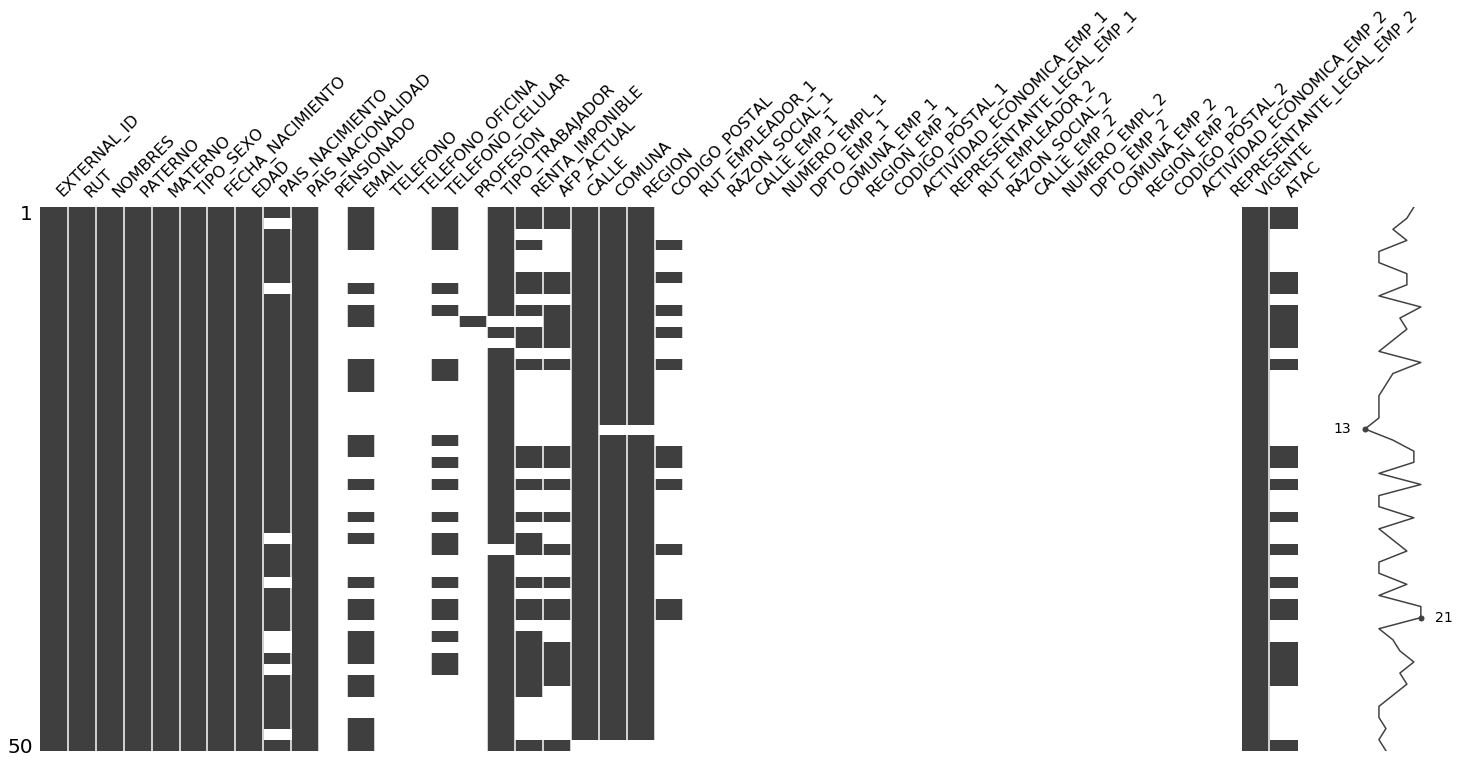

In [12]:
import numpy as np

clientes = clientes.replace("nan", np.nan)

import missingno as msno
%matplotlib inline

msno.matrix(clientes.sample(50))

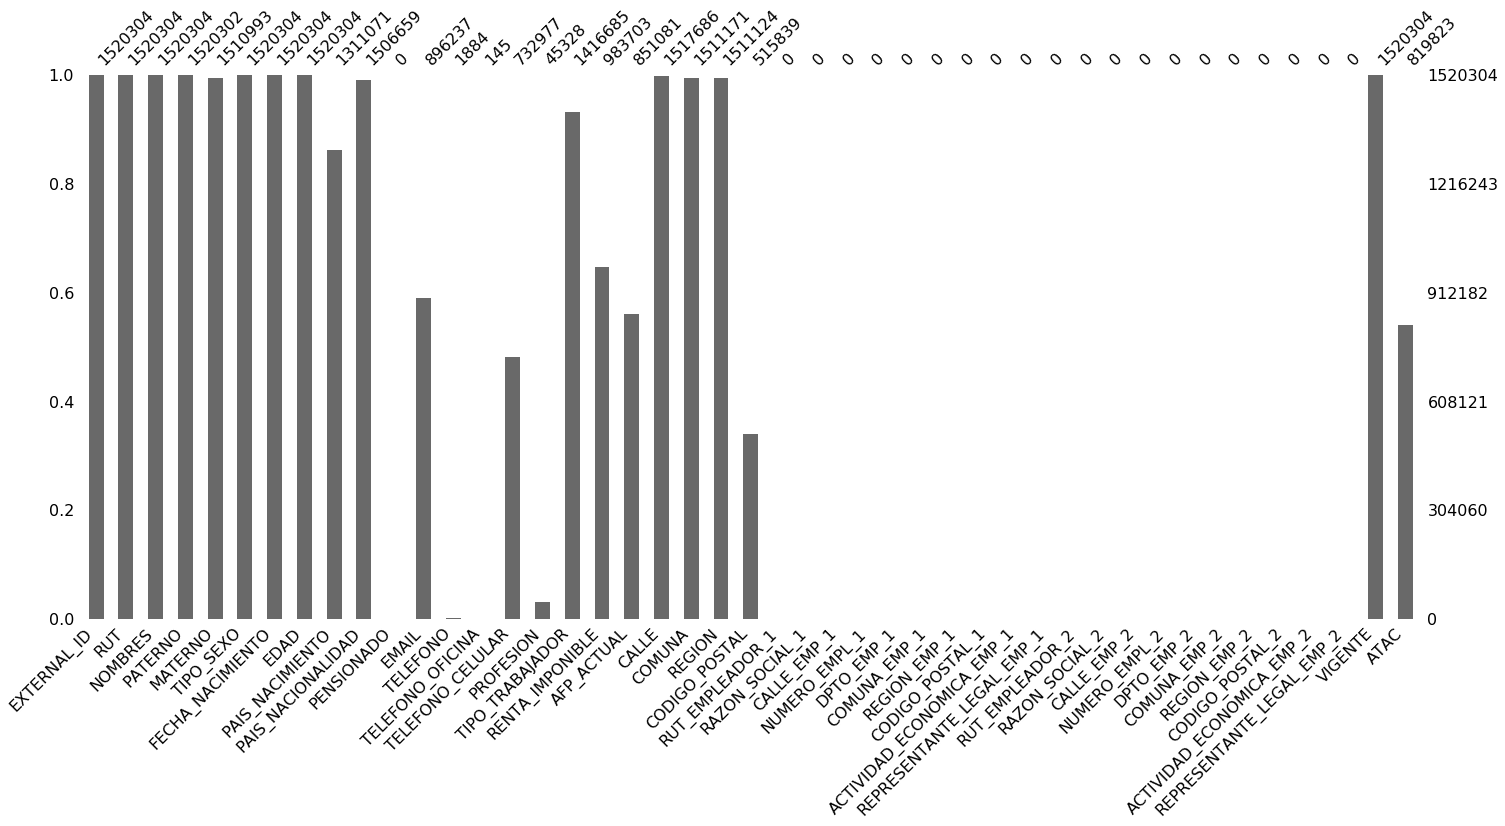

In [13]:
msno.bar(clientes)

## Dendrogram

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap.

The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero.

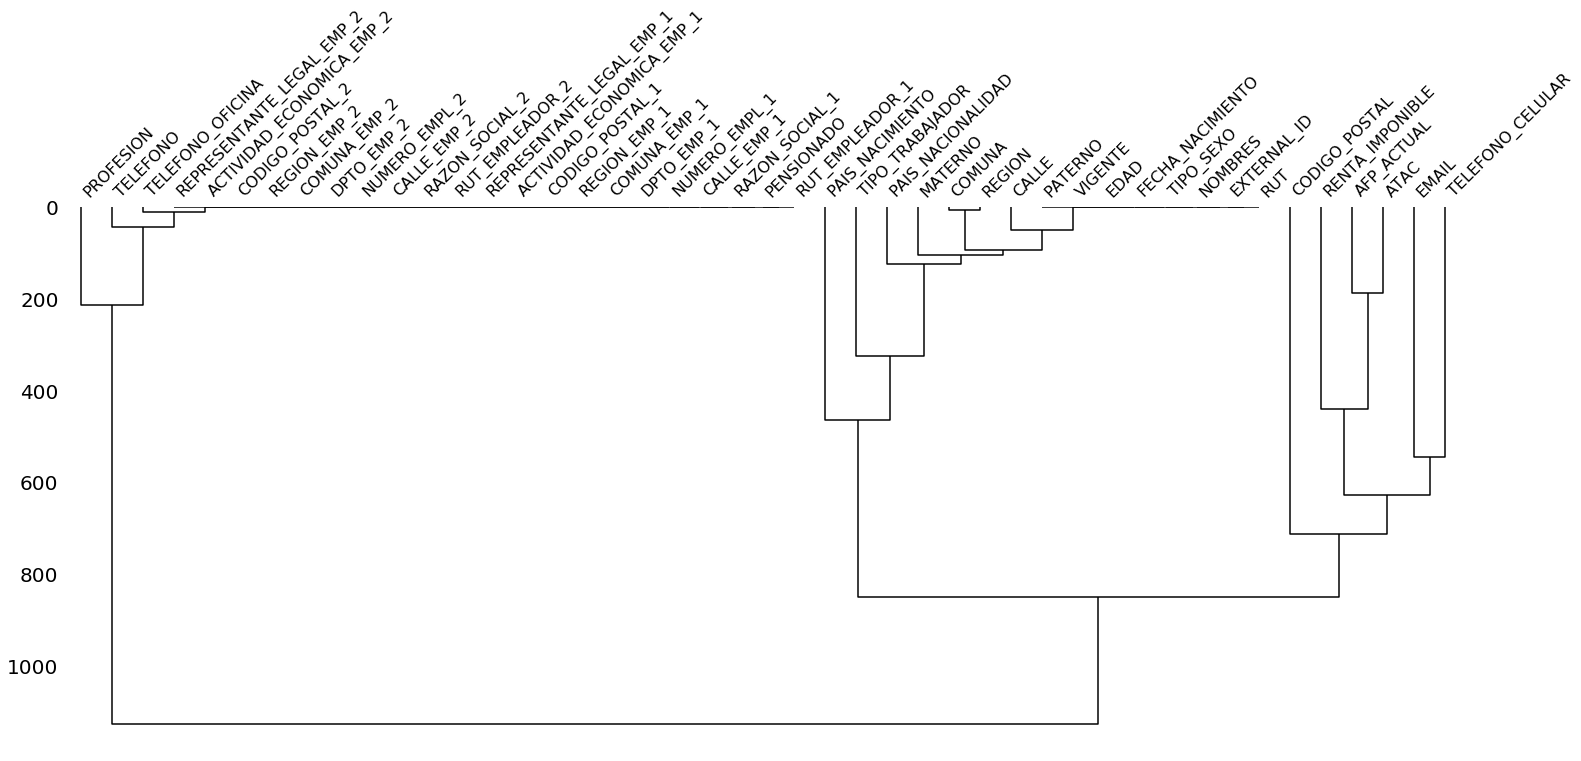

In [14]:
msno.dendrogram(clientes)

## Observaciones

* Más clientes hombres que mujeres
* Dentro de la muestra, existen clientes de 243 comunas. __¿Cómo realizar regresión con tal cantidad de categorías?¿Dummy variables?__
* Existe una categoria de región "SIN REGION ASIGNADA" ¿Debería cambiar esta categoria por NaN?
* Pocos clientes pensionados, no representan el target del trabajo

In [15]:
print ("Sexo:")
print (clientes['TIPO_SEXO'].value_counts())
print ("")

print ("Comuna (top 5):")
print (clientes['COMUNA'].value_counts().head())
print ("")

print ("Comunas totales:")
print (clientes['COMUNA'].value_counts().count())
print ("")

print ("Regiones:")
print (clientes['REGION'].value_counts())
print ("")

#print ("Region (top 5):")
#print (clientes['REGION'].value_counts().head())
#print ("")

#print ("Regiones totales:")
#print (clientes['REGION'].value_counts().count())
#print ("")

print ("Tipo de trabajador:")
print (clientes['TIPO_TRABAJADOR'].value_counts())


Sexo:
Masculino    910489
Femenino     609815
Name: TIPO_SEXO, dtype: int64

Comuna (top 5):
ANTOFAGASTA    68390
LAS CONDES     65391
SANTIAGO       61868
MAIPU          55489
LA FLORIDA     47015
Name: COMUNA, dtype: int64

Comunas totales:
347

Regiones:
METROPOLITANA                              691291
DEL BÍO BÍO                                147858
VALPARAÍSO                                 130875
ANTOFAGASTA                                106307
DEL LIBERTADOR GRAL. BERNARDO OHIGGINS      71153
DE LOS LAGOS                                59550
COQUIMBO                                    56048
DEL MAULE                                   55233
DE LA ARAUCANIA                             53530
ATACAMA                                     41003
TARAPACÁ                                    34239
DE LOS RÍOS                                 20298
DE MAGALLANES Y DE LA ANTÁRTICA             18464
ARICA Y PARINACOTA                          18071
AISÉN DEL GRAL. CARLOS IBÁÑEZ DEL CAMPO   

## Distribución de edades de los clientes

In [16]:
# Lets create age groups

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79',
          '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149']
clientes['age_group'] = pd.cut(clientes.EDAD, range(0, 151, 10), right=False, labels=labels)

# print (clientes[['age', 'age_group']].drop_duplicates().head(10))
# print ("-----")
# print (clientes.head(10))

age_group
0-9            47
10-19          62
20-29       31234
30-39      271345
40-49      437200
50-59      406264
60-69      247207
70-79      103675
80-89       19867
90-99        3053
100-109       324
110-119        25
120-129         0
130-139         0
140-149         1
Name: RUT, dtype: int64


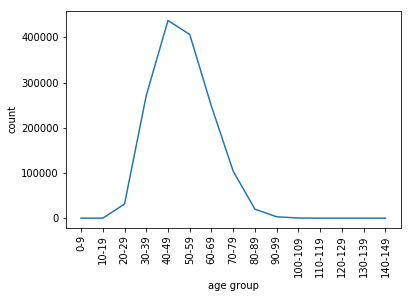

In [17]:
# Number of people per age group

import pylab as pl
import numpy as np

age_group = clientes.groupby ("age_group").count()
print (age_group["RUT"])

pl.clf()
pl.plot(np.arange(age_group.shape[0]), age_group.RUT)
pl.xticks(np.arange(age_group.shape[0]), labels, rotation='vertical')
pl.xlabel("age group")
pl.ylabel("count")
pl.show()


In [18]:
# Cuantas personas menores de 18 años existen?

clientes = clientes[clientes.EDAD < 18].dropna()

In [19]:
# Cuantas personas menores de 18 años existen?

clientes['RUT'][clientes.EDAD < 18].count()

0

In [20]:
# Cargando solo aquellas columnas que aportan información
import pandas as pd

clientes = pd.DataFrame()

for i in [1,2,3]:
    file = '../AFP data/Clientes/cl'+str(i)+'v3.csv'
    print("cargando clientes "+str(i))
    cl = pd.read_csv(file, encoding='latin-1')
    clientes = clientes.append(cl[['RUT','TIPO_SEXO','EDAD','PAIS_NACIMIENTO',
                                   'PAIS_NACIONALIDAD','PROFESION','AFP_ACTUAL','TIPO_TRABAJADOR',
                                   'RENTA_IMPONIBLE','COMUNA','VIGENTE']])
    
# Columnas no concideradas: 
#'INTERNAL_ID',
# 'NOMBRES',
# 'PATERNO',
# 'MATERNO',
# 'FECHA_NACIMIENTO', SE CUENTA CON CAMPO EDAD
# 'PENSIONADO',
# 'EMAIL',
# 'TELEFONO',
# 'TELEFONO_OFICINA',
# 'TELEFONO_CELULAR',
# 'AFP_ACTUAL',
# 'CALLE',
# 'REGION', REDUNDANTE CON COMUNA
# 'CODIGO_POSTAL',
# 'RUT_EMPLEADOR_1', VACÍA
# 'RAZON_SOCIAL_1', VACÍA
# 'CALLE_EMP_1', VACÍA
# 'NUMERO_EMPL_1', VACÍA
# 'DPTO_EMP_1', VACÍA
# 'COMUNA_EMP_1', VACÍA
# 'REGION_EMP_1', VACÍA
# 'CODIGO_POSTAL_1', VACÍA
# 'ACTIVIDAD_ECONOMICA_EMP_1', VACÍA
# 'REPRESENTANTE_LEGAL_EMP_1', VACÍA
# 'RUT_EMPLEADOR_2', VACÍA
# 'RAZON_SOCIAL_2', VACÍA
# 'CALLE_EMP_2', VACÍA
# 'NUMERO_EMPL_2', VACÍA
# 'DPTO_EMP_2', VACÍA
# 'COMUNA_EMP_2', VACÍA
# 'REGION_EMP_2', VACÍA
# 'CODIGO_POSTAL_2', VACÍA
# 'ACTIVIDAD_ECONOMICA_EMP_2', VACÍA
# 'REPRESENTANTE_LEGAL_EMP_2', VACÍA
# 'VIGENTE',
# 'ATAC']

del cl
clientes.head()

cargando clientes 1
cargando clientes 2
cargando clientes 3


,RUT,TIPO_SEXO,EDAD,PAIS_NACIMIENTO,PAIS_NACIONALIDAD,PROFESION,AFP_ACTUAL,TIPO_TRABAJADOR,RENTA_IMPONIBLE,COMUNA,VIGENTE
0,262299-8,Masculino,106,CHILE,CHILE,NaN,CuprumAFP,DEPENDIENTE,150000.0,ARICA,Vigente
1,294833-8,Masculino,78,CHILE,CHILE,NaN,CuprumAFP,DEPENDIENTE,688016.0,LA FLORIDA,Vigente
2,317667-3,Masculino,72,CHILE,CHILE,NaN,CuprumAFP,DEPENDIENTE,93881.0,PUERTO MONTT,Vigente
3,321180-0,Masculino,74,CHILE,CHILE,NaN,NaN,DEPENDIENTE,NaN,LINARES,No Vigente
4,342816-8,Masculino,105,CHILE,CHILE,NaN,CuprumAFP,INDEPENDIENTE,NaN,LA CISTERNA,Vigente


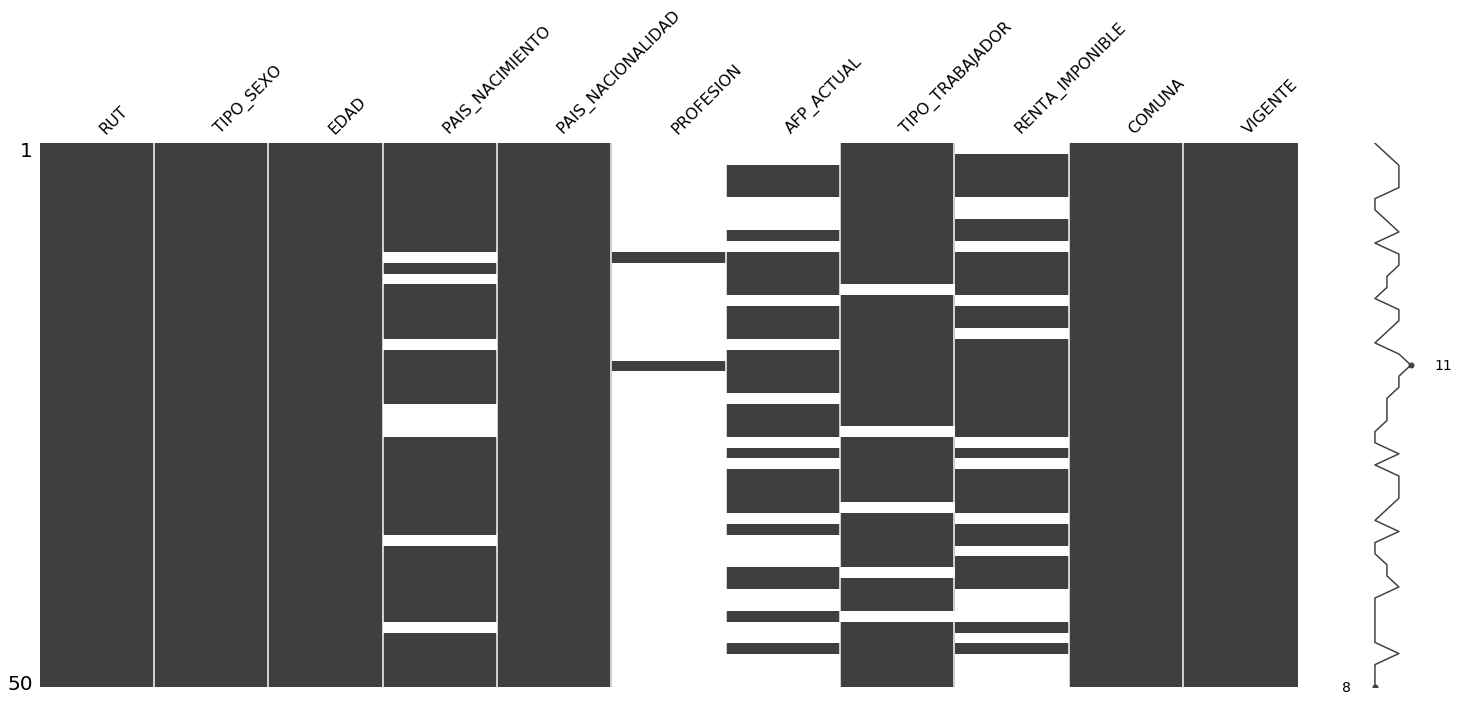

In [21]:
clientes = clientes.replace("nan", np.nan)

import missingno as msno
%matplotlib inline

msno.matrix(clientes.sample(50))

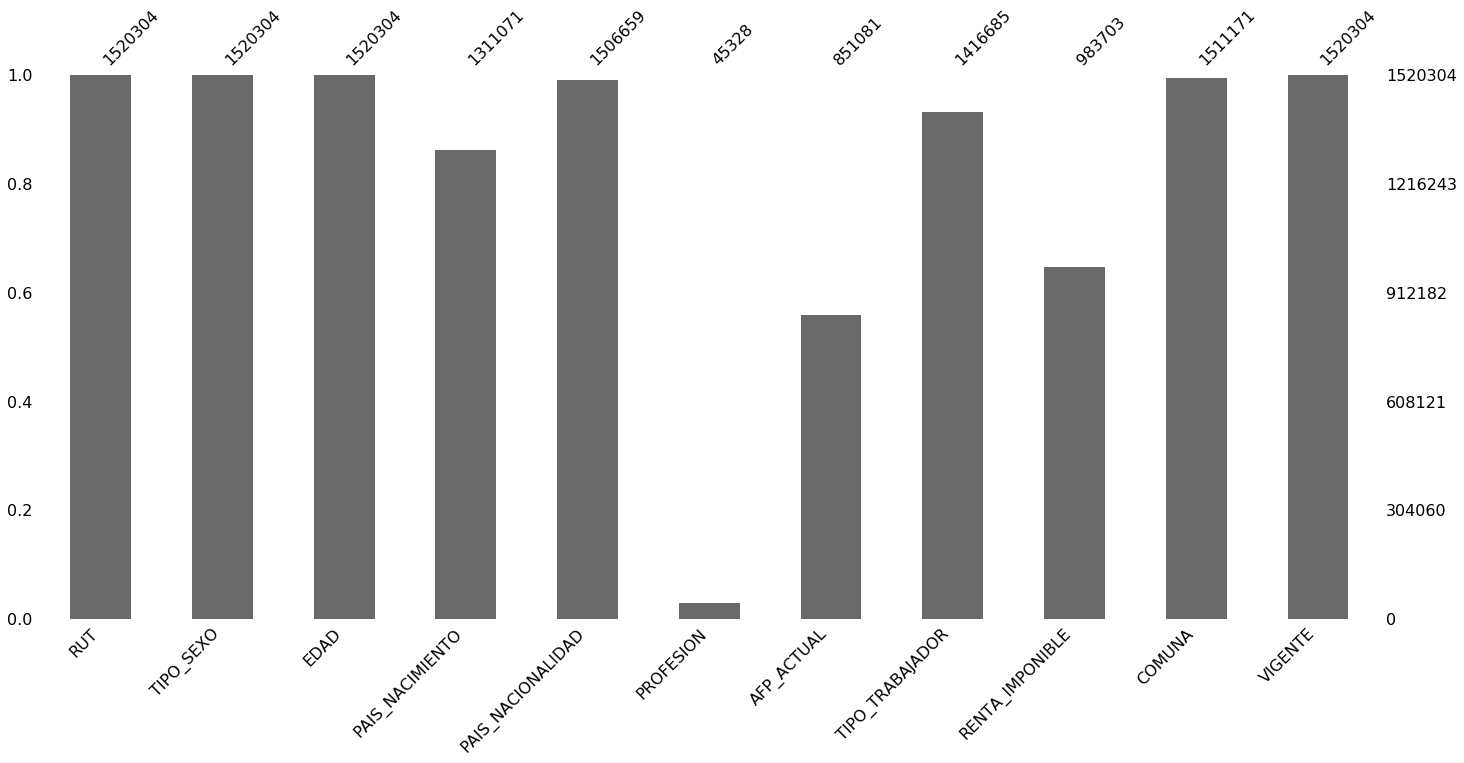

In [22]:
msno.bar(clientes)

In [23]:
clientes['RUT'][clientes.PAIS_NACIMIENTO != clientes.PAIS_NACIONALIDAD].count()

219867

In [24]:
clientes[['PAIS_NACIMIENTO', 'PAIS_NACIONALIDAD']][clientes.PAIS_NACIMIENTO != clientes.PAIS_NACIONALIDAD].head(100)

,PAIS_NACIMIENTO,PAIS_NACIONALIDAD
850,PERU,CHILE
1203,CHILE,NaN
1429,CHILE,NaN
3354,CHILE,NaN
3511,CHILE,NaN
3642,CHILE,NaN
7425,NaN,CHILE
15745,ESTADOS UNIDOS,CHILE
19718,CHILE,BOLIVIA
30086,CHILE,CAMERUN
